## $\chi^2$  Test and Non-Linear Fitting
### Submitted by: Junaid Ramzan Bhat
### Submitted to: Prof. Devaux Fabrice

#### Note: Please run the cells in order for the code to run properly

|   Time slot(T)   | 1.90 - 1.95 | 1.95 - 2.00 | 2.00 - 2.05 | 2.05 - 2.10 | 2.10 - 2.15 | 2.15 - 2.20 | 2.20 - 2.25 | 2.25 - 2.30 | 2.30 - 2.35 | 2.35 - 2.40 | 2.40 - 2.45 | 2.45 - 2.50 | 2.50 - 2.55 |
|-------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
|   Number of flights(N)   |     19      |     19      |     39      |     48      |     87      |     94      |    104      |     92      |     57      |     44      |     28      |     26      |     13      |


## Q1 
 Built the vector of data corresponding to the duration of each flight. Duration 
of each flight will be the average time of a time slot. Calculate the mean 
and the standard deviation of data.

The formula for the weighted mean ($\bar{x}$) of a dataset with different frequencies (weights) is given by:

$$
\bar{x} = \frac{\sum_{i=1}^n f_i \cdot x_i}{\sum_{i=1}^n f_i}
$$

Where:
- $\bar{x}$ is the weighted mean of the dataset.
- $n$ is the total number of data points.
- $f_i$ represents the frequency (weight) of the ith data point.
- $x_i$ represents the value of the ith data point.


The formula for the standard deviation of a data set with different frequencies is:
$$
\sigma = \sqrt{\frac{\sum_{i=1}^n f_i(x_i - \bar{x})^2}{\sum_{i=1}^n f_i}}
$$
where:

* σ is the standard deviation
* $f_i$ is the frequency of the i-th data point
* $x_i$ is the i-th data point
* $\bar{x}$ is the mean of the data set
* n is the total number of data points

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#Vector for average of each flight
time_slots_avg = np.array([1.925, 1.975, 2.025, 2.075, 2.125, 2.175, 2.225, 2.275, 2.325, 2.375, 2.425, 2.475, 2.525])

# Number of flights in each time slot
flight_counts = np.array([19, 19, 39, 48, 87, 94, 104, 92, 57, 44, 28, 26, 13])

durations = time_slots_avg * flight_counts         # Total duration of flights for each time slot
total_duration = np.sum(durations)                 # Total duration of all flights
total_flights = np.sum(flight_counts)              # Total number of flights

# Mean and standard deviation 
mean_duration = total_duration / total_flights
std_duration = np.sqrt(np.sum((time_slots_avg - mean_duration) ** 2 * flight_counts) / total_flights)

# Print the results
print("Mean Duration:", mean_duration)
print("Standard Deviation of Duration:", std_duration)



Mean Duration: 2.216119402985075
Standard Deviation of Duration: 0.13546305575421824


The obtained mean of the data is $\mu = 2.21$.

The standard deviation of the data is $\sigma = 0.135$.

Although not asked, we list the amplitude of the observed data, this will useful for the comparisons that we need to do in the later part of the practical.

Observed Amplitude of the data $= 104 $

## Q2
plot the histogram and the cumulative distribution of data using time slots 
as bins. Compare these graphs with distribution and cumulative distribution 
function of a normal law of equivalent mean and standard deviation.

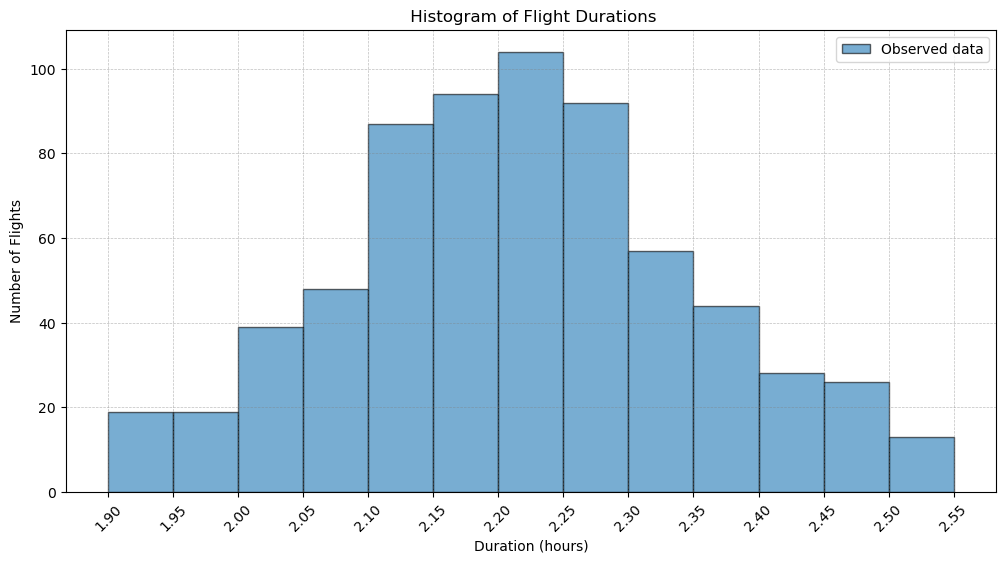

In [31]:
# Given time slots for the number of flights
time_slots = np.array([1.90, 1.95, 2.00, 2.05, 2.10, 2.15, 2.20, 2.25, 2.30, 2.35, 2.40, 2.45, 2.50, 2.55])

# Plot the actual data
plt.figure(figsize=(12, 6))
plt.hist(time_slots_avg, bins=time_slots, weights=flight_counts,edgecolor='k', alpha=0.6, label='Observed data')
plt.xlabel('Duration (hours)')
plt.ylabel('Number of Flights')
plt.title(' Histogram of Flight Durations')
plt.xticks(time_slots, rotation=45)
plt.grid(linestyle='--', alpha=0.5, color = "grey", linewidth = 0.5)
plt.legend()
plt.show()


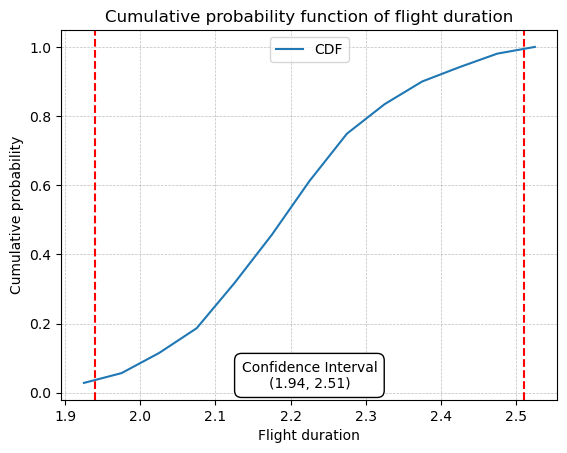

95% Confidence Interval: (1.9400000000000002, 2.51)


In [32]:
# Calculation of cumulative probabilities
cumulative_probabilities = np.cumsum(flight_counts)/total_flights

# Graphical determination of 95% percentile
lower_bound = np.percentile(time_slots_avg, 2.5)
upper_bound = np.percentile(time_slots_avg, 97.5)

# Plot the cdf
plt.plot(time_slots_avg, cumulative_probabilities, label = "CDF")
plt.axvline(lower_bound ,ymin=0, ymax=1, linestyle= '--', color = 'red')
plt.axvline(upper_bound, ymin=0, ymax=1, linestyle='--', color ="red")
plt.xlabel("Flight duration")
plt.ylabel("Cumulative probability")
plt.title("Cumulative probability function of flight duration")
plt.grid(linestyle='--', alpha=0.5, color = "grey", linewidth = 0.5)
plt.legend(loc = "upper center")

text_x = (upper_bound + lower_bound) / 2  
text_y = 0.05
plt.text(text_x, text_y, f"Confidence Interval\n({lower_bound:.2f}, {upper_bound})", ha='center', va='center',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

# Print the 95% percentile
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")


The expected data = [ 10.35316017  21.37887595  38.52382387  60.57682351  83.12203952
  99.53102388 104.          94.82891761  75.45375096  52.3906108
  31.74378257  16.78403886   7.74402709]


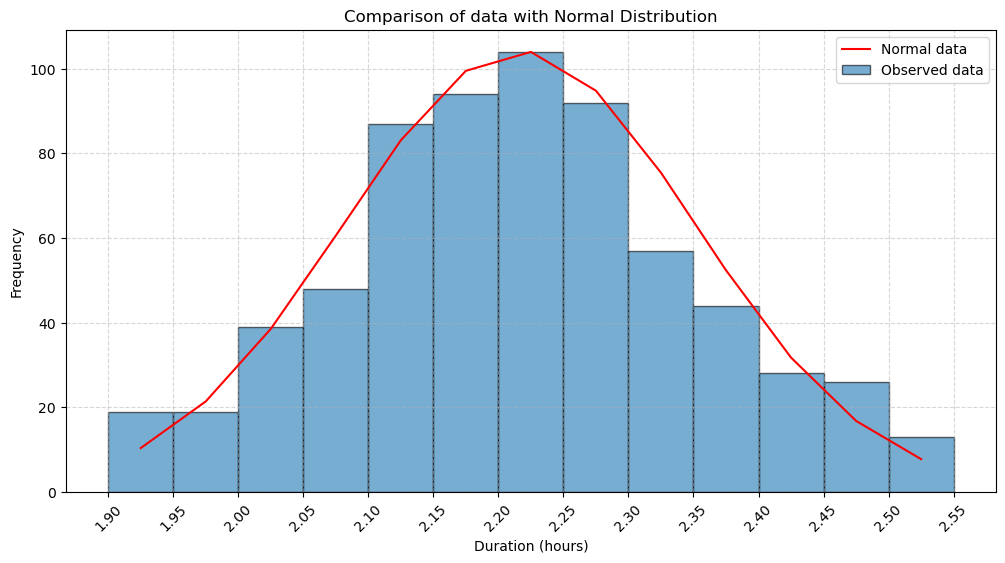

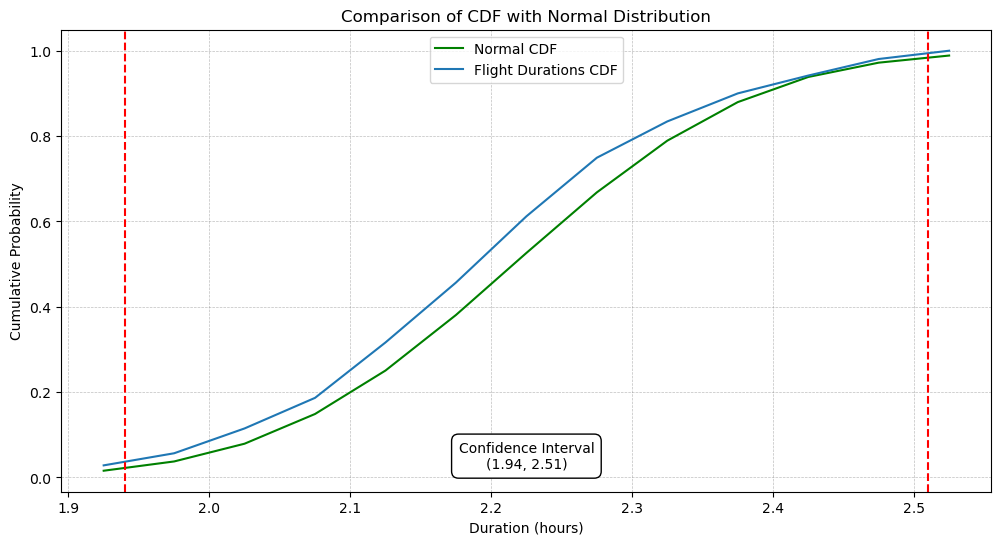

In [33]:
# Compare with the normal distribution
x = time_slots_avg

# Normal probability distribution function and cumulative distribution function
pdf = stats.norm.pdf(x, loc=mean_duration, scale=std_duration)  
pdf *= np.max(flight_counts) /max(pdf)  # To match the histogram
cdf = stats.norm.cdf(x, loc=mean_duration, scale=std_duration)

print(f'The expected data = {pdf}')

# Plot the histogram and normal pdf
plt.figure(figsize=(12, 6))
plt.plot(x, pdf, label='Normal data', color='red')
plt.hist(time_slots_avg, bins=time_slots, weights=flight_counts, edgecolor = 'k', alpha=0.6, label='Observed data')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.title('Comparison of data with Normal Distribution')
plt.xticks(time_slots, rotation=45)
plt.grid(linestyle = '--', alpha = 0.5)
plt.legend()

# graphical percentile calculation
lower_bound = np.percentile(time_slots_avg, 2.5)
upper_bound = np.percentile(time_slots_avg, 97.5)


# Plot the normal cdf and data cdf
plt.figure(figsize=(12, 6))
plt.plot(x, cdf, label='Normal CDF', color='green')
plt.plot(time_slots_avg, cumulative_probabilities, label = 'Flight Durations CDF')
plt.axvline(lower_bound ,ymin=0, ymax=1, linestyle= '--', color = 'red')
plt.axvline(upper_bound, ymin=0, ymax=1, linestyle='--', color ="red")
plt.xlabel('Duration (hours)')
plt.ylabel('Cumulative Probability')
plt.title('Comparison of CDF with Normal Distribution')
plt.grid(linestyle='--', alpha=0.5, color = "grey", linewidth = 0.5)
plt.legend(loc = "upper center")
text_x = (upper_bound + lower_bound) / 2  
text_y = 0.05
plt.text(text_x, text_y, f"Confidence Interval\n({lower_bound:.2f}, {upper_bound})", ha='center', va='center',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


plt.show()

Both of the above graphs give the comparison of the data with the normal distribution of same mean and standard deviation. To Further analyse the data and to check whether it fits the guassian or not, we will find the chi-square statistic.

 ## Q3
 Compute $D^2$of data. 

**Chi-Squared Statistic $(D^2)$ Calculation**

To compute the chi-squared statistic $(D^2)$ of data, we use the formula for the chi-squared goodness-of-fit test. In this context, $D^2$ measures how well the observed frequencies match the expected frequencies. The formula is as follows:

$$
D^2 = \sum \frac{(O - E)^2}{E}
$$

Where:
- $D^2$ is the chi-squared statistic.
- O represents the observed frequencies.
- E represents the expected frequencies.

In this case, we already have the observed values in the `flight_counts` array and the expected values have been computed using the **stats.norm.pdf** function but need to be stored in an array to be used for the calculation.


In [34]:
# Array to store the normal pdf values
exp_values = []
for i in pdf:
    exp_values.append(i)

# chi-squared statistic calculation
chi_squared = np.sum((flight_counts - exp_values) ** 2 / exp_values)
print(f'Chi-squared statistic = {chi_squared}')



Chi-squared statistic = 25.602445510535784


The chi-squared statistic of the data is $25.60$, We can either check the $\chi^{2}$ table to find whether it  is compatible with the guassian hypothesis or calculate the p-value of the data.

#### The degree of freedom of the data is 12.

In [35]:
# P-value of the data
p_value = 1 - stats.chi2.cdf(chi_squared, 12)
print(f'p_value = {p_value}')

p_value = 0.012212382672987743


The p-value of the data is less than 0.05, so the data is not compatible with the  guassian hypothesis. Thus, we reject the hypothesis.

## Gauss-Newton Fitting

covariance matrix
[[ 1.99850419e+01  1.36007378e-04 -1.88215833e-02]
 [ 1.36007378e-04  4.96462949e-05 -4.54542956e-07]
 [-1.88215833e-02 -4.54542956e-07  5.19082105e-05]]

Optimized Parameters:
Amplitude: 98.57887451983507
Mean: 2.2109563187351156
Standard Deviation: 0.13483073051514086

Uncertainity of the Parameters:
Amplitude SE: 4.470463271317504
Mean SE: 0.007046012697063191
Standard Deviation SE: 0.0072047352845670785


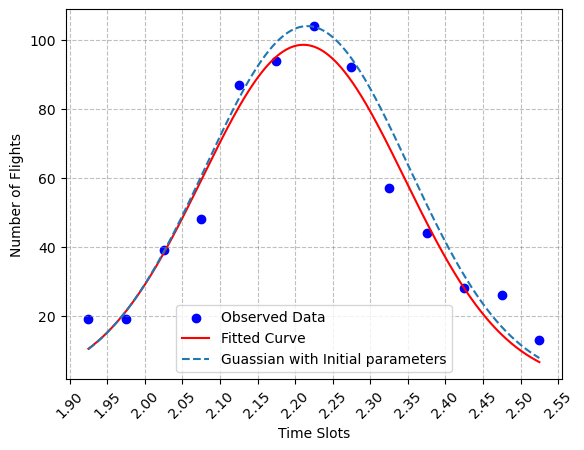

In [36]:
from scipy.optimize import curve_fit

# Define a guassian function to be used for data fit
def gaussian_model(x, amplitude, mean, std_dev):
    return amplitude * np.exp(-((x - mean))**2 / (2*std_dev ** 2))

# Initial parameters based on the data parameters
initial_params = [104, mean_duration, std_duration]  # Amplitude, Mean, standard deviation

# Optimized Parameters and covariance matrix
# curve_fit performs the guass newton fitting of the data
optimized_params, covariance = curve_fit(gaussian_model, time_slots_avg, flight_counts, p0=initial_params) 


print("covariance matrix")
print(covariance)
standard_errors = np.sqrt(np.diag(covariance))

print("\nOptimized Parameters:")
print("Amplitude:", optimized_params[0])
print("Mean:", optimized_params[1])
print("Standard Deviation:", optimized_params[2])


print("\nUncertainity of the Parameters:")
print("Amplitude SE:", standard_errors[0])
print("Mean SE:", standard_errors[1])
print("Standard Deviation SE:", standard_errors[2])


# Gaussian fit of the initial data
x_fit = np.linspace(time_slots_avg.min(), time_slots_avg.max(), 1000)
y_fit = gaussian_model(x_fit, *optimized_params)
y_initial = gaussian_model(x_fit, *initial_params)

# Plot the curves 
plt.scatter(time_slots_avg, flight_counts, label="Observed Data", color='b')
plt.plot(x_fit, y_fit, label="Fitted Curve", color='r')
plt.plot(x_fit, y_initial, label="Guassian with Initial parameters", linestyle = "--")
plt.xlabel("Time Slots")
plt.ylabel("Number of Flights")
plt.xticks(np.arange(1.90, 2.56, 0.05), rotation = 45)
plt.grid(color = "grey", alpha = 0.5, linestyle = "--")
plt.legend()
plt.show()


#### Covariance Matrix:

|             |               |                 |
|-------------|---------------|-----------------|
| 1.99850419e+01 | -1.88215833e-02 | 1.36007378e-04 |
| -1.88215833e-02 | 5.19082105e-05 | -4.54542956e-07 |
| 1.36007378e-04 | -4.54542956e-07 | 4.96462949e-05 |

From the diagonal terms of the covariance matrix we can estimate the 95% confidence interval for optimized parameters. The square root of the diagonal elements of the covariance matrix gives the standard deviation associated with each of the parameter and this information can be used to find the 95% confidence interval of the optimized parameters.

One more important thing to see from the covariance matrix is that all the non-diagonal elements are nearly zero (or negligible), this means that the parameters of the data are uncorrelated.

*Here we will cite our results correct upto two significant figures because the optimized amplitude (max. flights) must be a natural number.*

| **Parameter**       | **Value** | **Uncertainty** |
|---------------------|-----------|-----------------|
| Amplitude           | $99$      | $\pm 9$         |
| Mean                | $2.2$     | $\pm 0.00$      |
| Standard Deviation  | $0.13$    | $\pm 0.00$        |

We accept that some essence of the data is lost by using only 2 significant figures for mean and standard deviation but as explained above, we are constrained and have to be consistent with the number of the significant figures that we use to represent the data.

The initial mean as well as the initial standard deviation is exactly same upto 2 significant figures and there is not much difference. As for the initial amplitude, we see that it falls within the 95% confidence interval of the optimized amplitude.

Initially, we found that the data does not follow a gaussian distribution yet here we found a gaussian fit for the data. This may seem counter-intuitive but its explanation lies in the way the Guass-Newton non linear fitting works. Gauss-Newton method is based on minimizing the sum of the residuals squares and by finding the optimized parameters, we essentially found the best-fit Gaussian distribution that closely matches the observed data. The optimization process adjusts the parameters such as mean and standard deviation of the Gaussian distribution to minimize the differences between the model and the data. This can result in a good fit, even if the data does not strictly follow a Gaussian distribution. In other words, the reason you can find a good fit with a Gaussian model despite the rejection of the Gaussian hypothesis is that the optimization process is focused on finding the best parameters that explain the observed data, rather than strictly adhering to the assumptions of the chi-square test.

#### Conclusion
In this practical, we performed the $\chi^2 $ test on a given set of the data and decided whether to accept or reject the null hypothesis based on the obtained results of the test. In the second part of the practical, we performed the non-linear fit of the data with a gaussian model using Gauss-Newton method and found that even if the data is fit with a certain model(Gaussian, in our case), it does not mean that the data follows that particular model. To arrive at such conclusions, we need to perform tests like the $\chi^2$  test.